# Social Media Analytics - Group Project 

###### Group 5: Salma BARKETALLAH, Ndjaidoukmi KEDA, Noémie GAUTIER

Company: Google

 In this notebook, we will analyze the user/ friends / followers of Google

In [1]:
options(warnings = -1)

###  Loading the required packages 

In [2]:
# Install rtweet package:
if(!require("rtweet")) install.packages("rtweet", quiet=TRUE); library("rtweet", quiet=TRUE)

Loading required package: rtweet
Warning message:
"package 'rtweet' was built under R version 3.6.3"

In [3]:
# Install Other packages:
for (i in c('topicmodels','ggplot2','readr','SnowballC','slam','tm','Matrix','tidytext','dplyr','hunspell','purrr','wordcloud','RWeka')){
  if (!require(i, character.only=TRUE)) install.packages(i, repos = "http://cran.us.r-project.org", quiet=TRUE)
  require(i, character.only=TRUE, quiet=TRUE)
}

Loading required package: topicmodels
Warning message:
"package 'topicmodels' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Loading required package: readr
Warning message:
"package 'readr' was built under R version 3.6.3"Loading required package: SnowballC
Warning message:
"package 'SnowballC' was built under R version 3.6.3"Loading required package: slam
Warning message:
"package 'slam' was built under R version 3.6.3"Loading required package: tm
Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP
Warning message:
"package 'NLP' was built under R version 3.6.3"
Attaching package: 'NLP'

The following object is masked from 'package:ggplot2':

    annotate

Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"Loading required package: tidytext
Warning message:
"package 'tidytext' was built under R version 3.6.3"L

package 'RWeka' successfully unpacked and MD5 sums checked


Warning message:
"package 'RWeka' was built under R version 3.6.3"Error: package or namespace load failed for 'RWeka':
 .onLoad failed in loadNamespace() for 'rJava', details:
  call: fun(libname, pkgname)
  error: JAVA_HOME cannot be determined from the Registry


In [4]:
library(tidyverse, quiet=TRUE)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  3.0.3     v stringr 1.4.0
v tidyr   1.1.2     v forcats 0.5.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x NLP::annotate()  masks ggplot2::annotate()
x tidyr::expand()  masks Matrix::expand()
x dplyr::filter()  masks stats::filter()
x purrr::flatten() masks rtweet::flatten()
x dplyr::lag()     masks stats::lag()
x tidyr::pack()    masks Matrix::pack()
x tidyr::unpack()  masks Matrix::unpack()


In [6]:
library(leaflet)
library(maps)

ERROR: Error in library(leaflet): there is no package called 'leaflet'


##  Loading the CSV files:

In [7]:
# Ids of Google Account followers
google_followers <- read_csv("google_followers.csv", col_types = cols())

#Ids of Google Account friends
google_friends <- read_csv("google_friends.csv", col_types = cols())

# Ids of Google account Users
#google_users <- read_csv("google_users.csv", col_types = cols())

# In which list does Google belong to
#google_memberships <- read_csv("google_memberships.csv", col_types = cols())

# Info about Google members
#google_members1 <- read_csv("google_members1.csv", col_types = cols())
#google_members2 <- read_csv("google_members2.csv", col_types = cols())

###  User Analysis

###### Followers Analysis

In [8]:
#read followers data from  csv file
google_followers <- read_csv("google_followers.csv", col_types = cols())

In [9]:
nrow(google_followers)

[1] 434779

In [10]:
#select only useful columns for the analysis
followers_data <- google_followers %>%
                  select("user_id", "lang" , "country", "country_code", "country_code", "coords_coords", "protected", 
                         "followers_count", "friends_count", "listed_count", "statuses_count", "favourites_count", "account_lang", "verified")

In [11]:
#number of followers with verified account
verified <- followers_data[followers_data$verified == TRUE ,]
nrow(verified)

[1] 201

In [12]:
#number of followers with protected account
protected <- followers_data[followers_data$protected == TRUE ,]
nrow(protected)

[1] 37909

In [13]:
#number of followers with regular/normal account
normal <- followers_data[(followers_data$protected == FALSE & followers_data$verified == FALSE) ,]
nrow(normal)

[1] 396670

In [14]:
#create a data frame with statistic of verified, normal and protected account
data_followers <- data.frame(
  category=c("Verified", "Protected", "Normal"),
  count=c(201, 37909, 396670)
)
data_followers$percentage = round((data_followers$count / sum(data_followers$count) * 100),2)

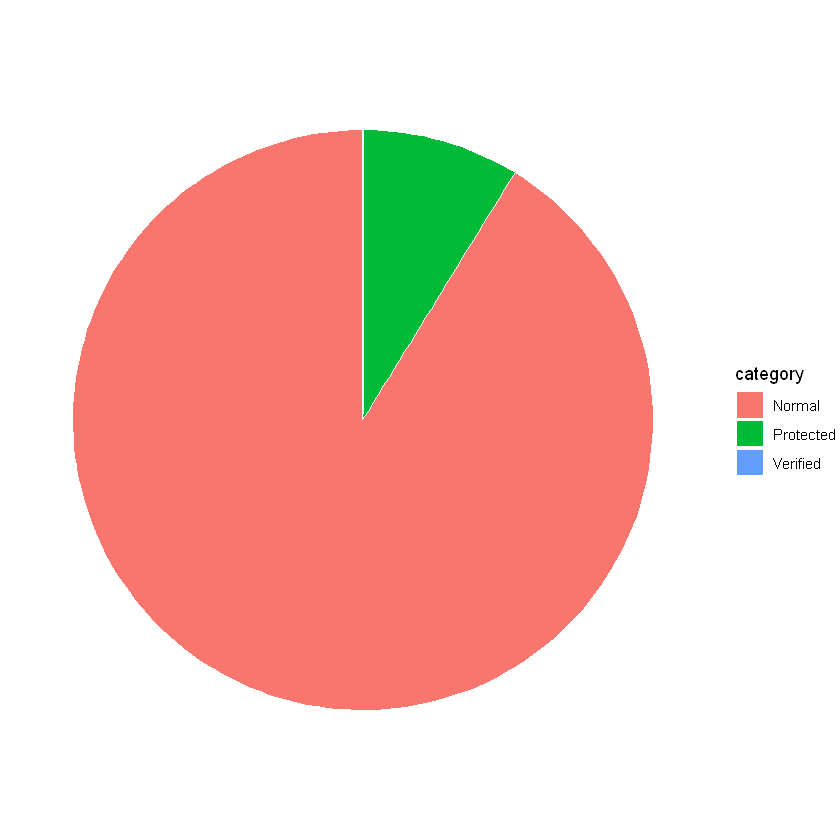

In [15]:
#create pie chart for the categories of user
ggplot(data_followers, aes(x="", y=percentage, fill=category)) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar("y", start=0) +
  theme_void()

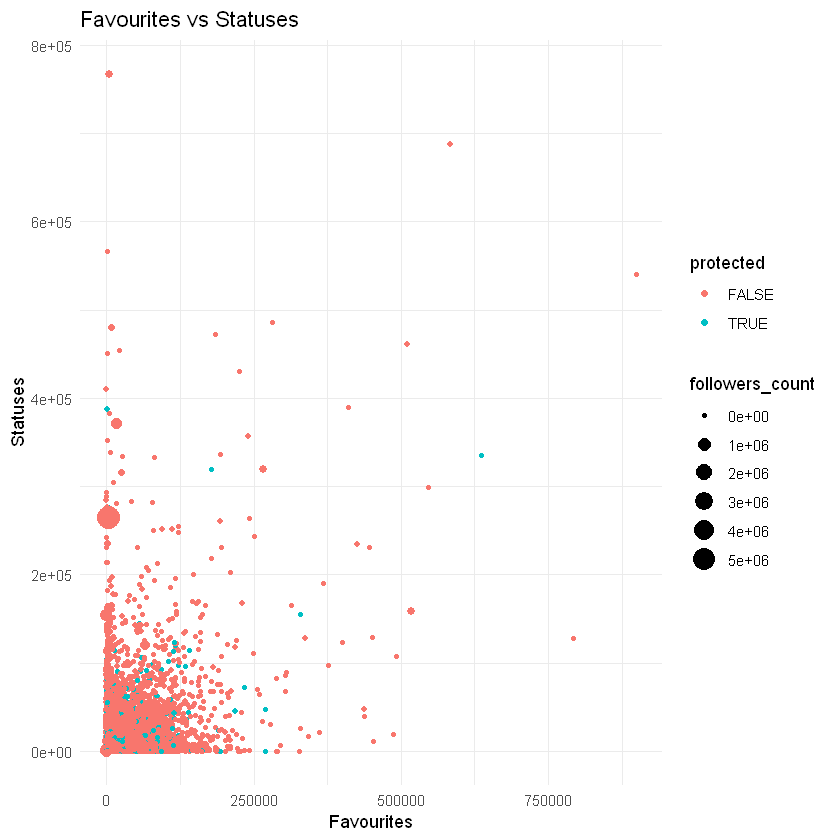

In [16]:
#plot favourites count vs status count
ggplot(followers_data, aes(x=favourites_count, y=statuses_count)) + 
    geom_point(aes(size=followers_count, color=protected))+
    theme_minimal()+
    labs(title="Favourites vs Statuses", x="Favourites", y="Statuses")

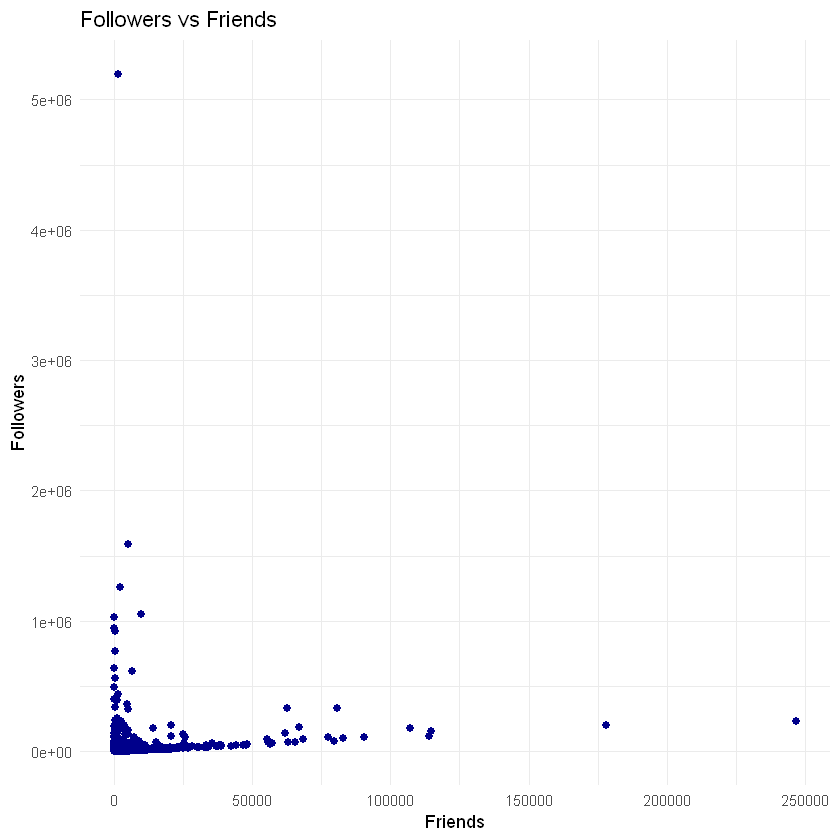

In [17]:
#plot followers count vs friends count
ggplot(followers_data, aes(x=friends_count, y=followers_count)) + 
    geom_point(size=2, color='darkblue')+
    theme_minimal()+
    labs(title="Followers vs Friends", x="Friends", y="Followers")

Selecting by n
Warning message:
"Ignoring unknown parameters: stat"

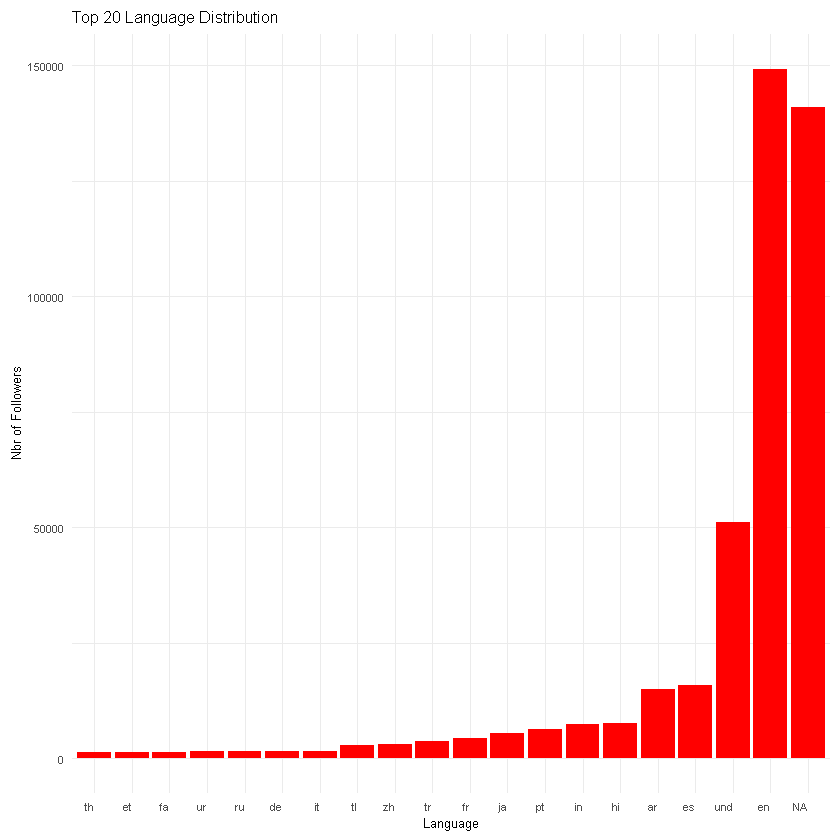

In [18]:
#Plot top 20 language of google followers
followers_lang <- followers_data%>%
                  count(lang, sort = T)%>%
                  top_n(20)
ggplot(followers_lang, aes(x=reorder(lang,n), y=n)) + 
  geom_col(fill='red',  position = "dodge", stat="identity") + 
  theme_minimal() + 
  theme(text = element_text(size=8), axis.text.x = element_text(hjust=1)) + 
  labs(title="Top 20 Language Distribution", x="Language", y="Nbr of Followers")


###### Friends Analysis

In [19]:
#Load CSV file of friends data
google_friends_data <- read_csv("google_friends_data.csv", col_types = cols())

In [20]:
nrow(google_friends_data)

[1] 293

In [21]:
#Number of friends with verified account
verified_friends <- google_friends_data[google_friends_data$verified == TRUE ,]
nrow(verified_friends)

[1] 235

In [22]:
#number of friends with protected account
protected_friends <- google_friends_data[google_friends_data$protected == TRUE ,]
nrow(protected_friends)

[1] 7

In [23]:
#number of friends with non protected and non verifief account (normal twitter user)
normal_friends <- google_friends_data[(google_friends_data$protected == FALSE & google_friends_data$verified == FALSE) ,]
nrow(normal_friends)

[1] 56

In [24]:
#number of friends with protected and verifief account
pro_ver_friends <- google_friends_data[(google_friends_data$protected == TRUE & google_friends_data$verified == TRUE) ,]
nrow(pro_ver_friends)

[1] 5

In [25]:
#create a data frame with statistic of verified, normal and protected friends account
data_friends <- data.frame(
  category=c("Verified", "Protected", "Normal"),
  count=c(235, 7, 56)
)
data_friends$percentage = round((data_friends$count / sum(data_friends$count) * 100),2)
data_friends


category,count,percentage
Verified,235,78.86
Protected,7,2.35
Normal,56,18.79


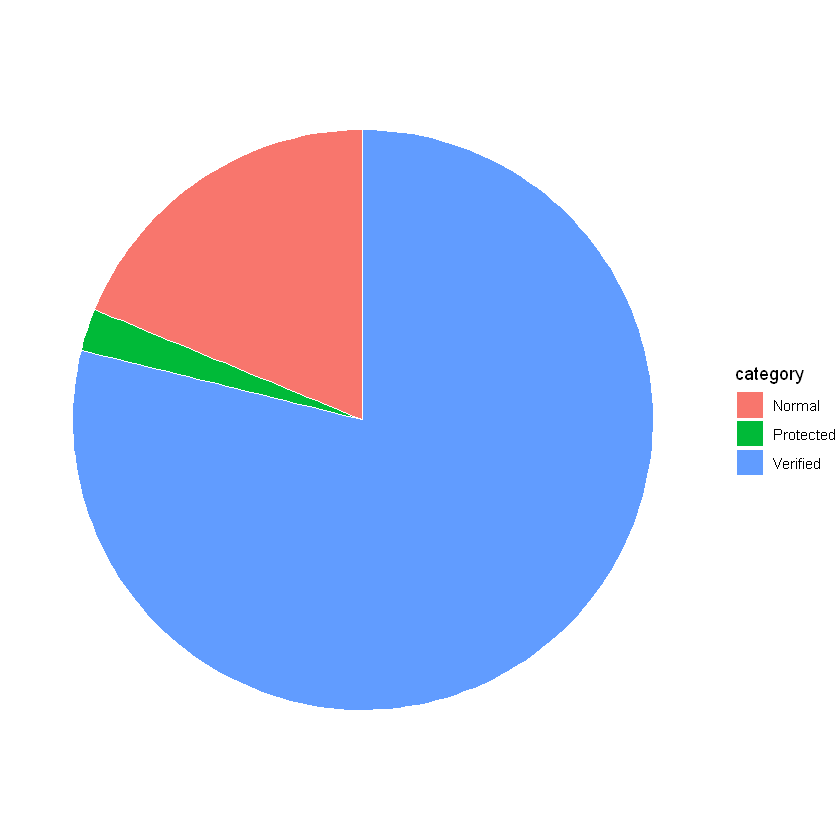

In [26]:
#create pie chart for the categories of friends user
ggplot(data_friends, aes(x="", y=percentage, fill=category)) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar("y", start=0) +
  theme_void()

In [27]:
head(google_friends_data, n=2)

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
x20536157,x1355586357444358144,2021-01-30 18:39:07,Google,"@R_Alex_Ceniviva Hi again, just a quick follow-up. Did you get a chance to try the above suggested steps? Keep us posted.",Conversocial,NA,x1355214757461155841,x2629629323,R_Alex_Ceniviva,...,126951,2979,2009-02-10 19:14:39,TRUE,https://t.co/jGyu5e8Pzx,http://google.com/yearinsearch,NA,https://pbs.twimg.com/profile_banners/20536157/1609170466,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1343584679664873479/Xos3xQfk_normal.jpg
x398500188,x1353740221389500416,2021-01-25 16:23:14,WittedNote,"To help get vaccines to more people, Google is providing $150M to promote vaccine education &amp; equitable access, and… https://t.co/PfIopiuuN8",Twitter Web App,NA,NA,NA,NA,...,799,25,2011-10-26 04:28:50,TRUE,http://t.co/mDCYKcMkZR,http://research.google.com/pubs/PrabhakarRaghavan.html,NA,https://pbs.twimg.com/profile_banners/398500188/1602265701,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1608460682/bologna_normal.PNG


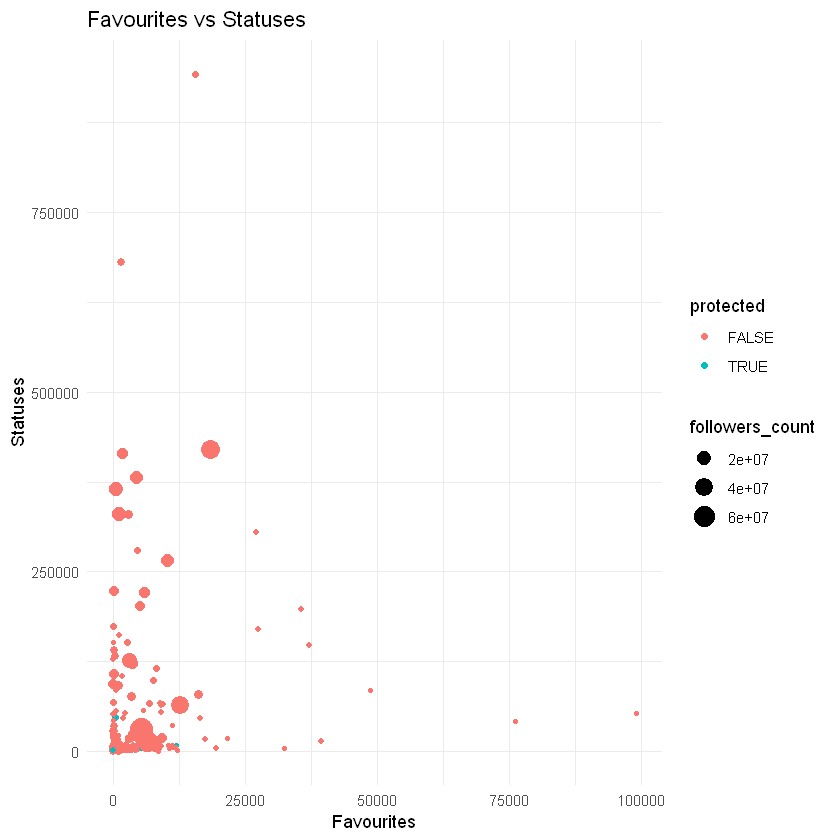

In [28]:
#plot favourites count vs status count
ggplot(google_friends_data, aes(x=favourites_count, y=statuses_count)) + 
    geom_point(aes(size=followers_count, color=protected))+
    theme_minimal()+
    labs(title="Favourites vs Statuses", x="Favourites", y="Statuses")

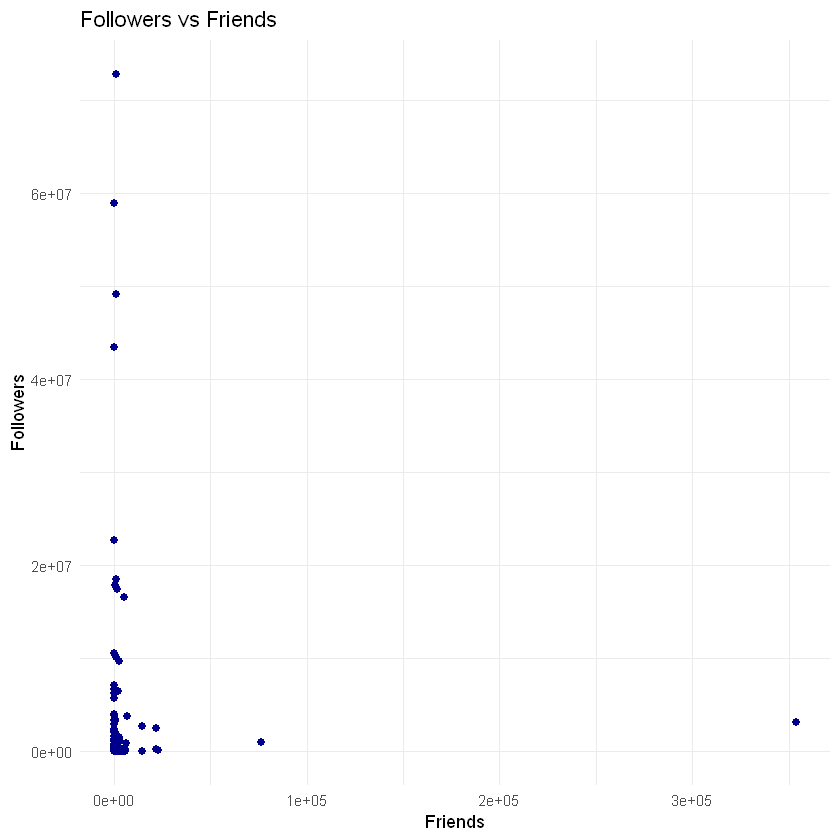

In [29]:
#plot followers count vs friends count
ggplot(google_friends_data, aes(x=friends_count, y=followers_count)) + 
    geom_point(size=2, color='darkblue')+
    theme_minimal()+
    labs(title="Followers vs Friends", x="Friends", y="Followers")

Selecting by n
Warning message:
"Ignoring unknown parameters: stat"

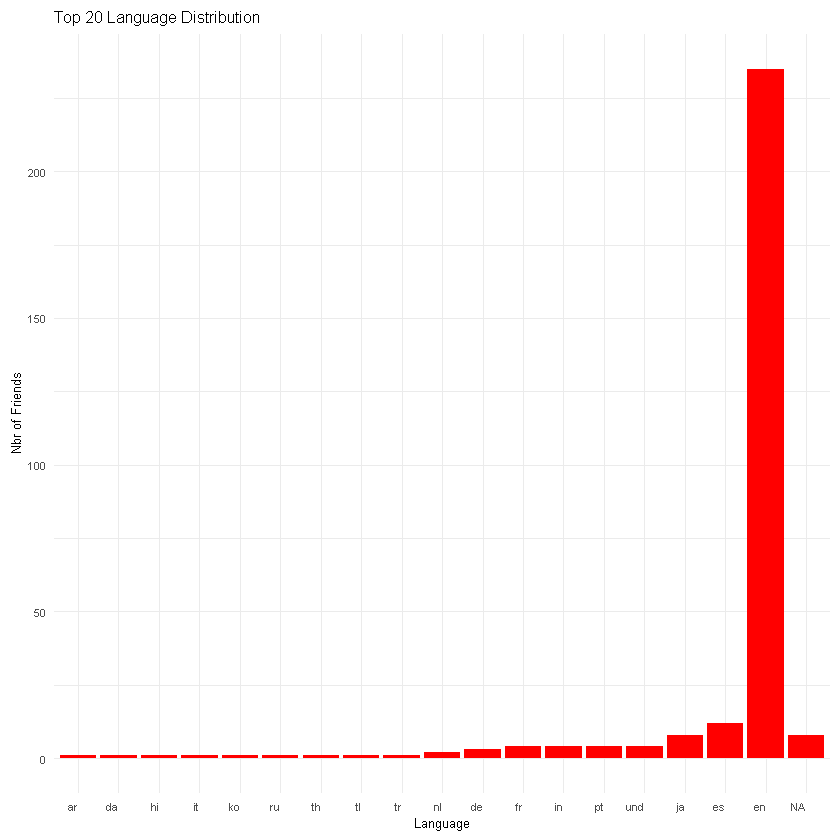

In [30]:
#Plot top 20 language of google friends
friends_lang <- google_friends_data%>%
                  count(lang, sort = T)%>%
                  top_n(20)
ggplot(friends_lang , aes(x=reorder(lang,n), y=n)) + 
  geom_col(fill='red',  position = "dodge", stat="identity") + 
  theme_minimal() + 
  theme(text = element_text(size=8), axis.text.x = element_text(hjust=1)) + 
  labs(title="Top 20 Language Distribution", x="Language", y="Nbr of Friends")

In [31]:
# clean the columns coords_coords and split into to columns long and lat
followers_geodata <- google_followers %>%
                    mutate(coords_coords = gsub("\\)|c\\(", "", coords_coords))%>%
                    separate(coords_coords, c("long", "lat"), sep = ", ")%>%
                    mutate_at(c("lat", "long"), as.numeric)


Warning message:
"Expected 2 pieces. Missing pieces filled with `NA` in 434779 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...]."Warning message:
"Problem with `mutate()` input `long`.
i NAs introduced by coercion
i Input `long` is `.Primitive("as.double")(long)`."Warning message in mask$eval_all_mutate(dots[[i]]):
"NAs introduced by coercion"

In [32]:
# Create a world map
world_map <- ggplot() +
  borders("world", colour = "gray25", fill = "gray")+
  theme_minimal()

Warning message:
"Removed 434779 rows containing missing values (geom_point)."

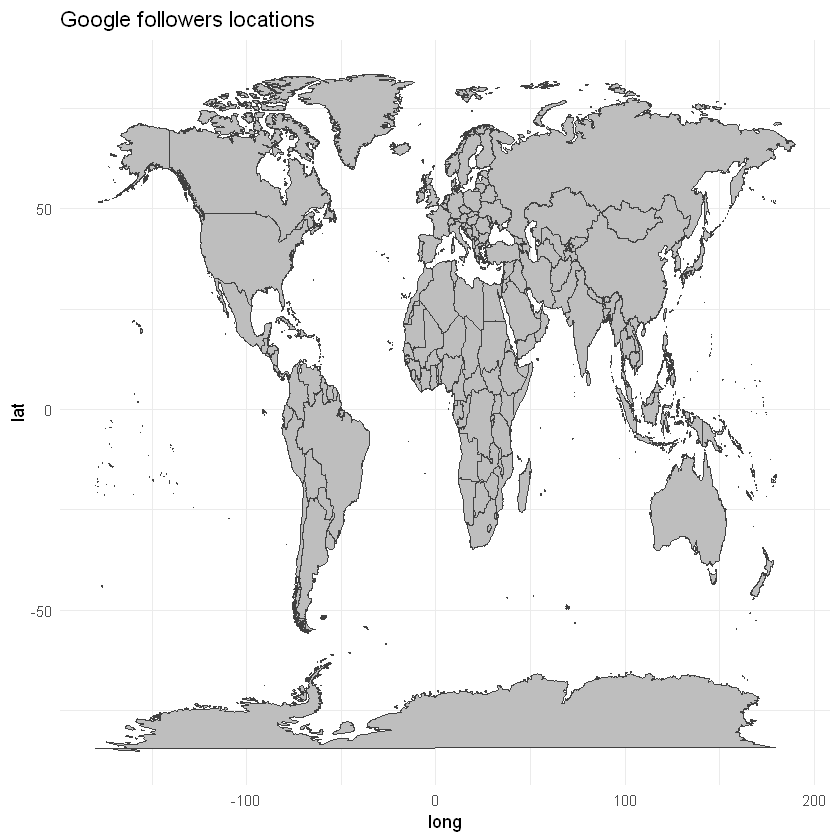

In [33]:
#plot google followers around world

world_map +
  geom_point(data = followers_geodata, aes(x = long, y = lat),
             colour = 'red', alpha = .5) +
  labs(title = "Google followers locations")